# Tools and Methods of Data Analysis
## Session 5 - Part 1

Niels Hoppe <<niels.hoppe.extern@srh.de>>

### Overview of Theoretical Distributions

|            | discrete | continuous |
|------------|----------|------------|
| Actual     | Binomial | Normal     |
| Approx. by | Poisson  | T          |

In [79]:
from scipy import stats

stats.binom
stats.poisson
stats.norm
stats.t

### Functions of Theoretical Distributions

**Probability mass function**:

the probability that a **discrete** random variable is exactly equal to some value

**Probability density function**:

the probability that a **continuous** variable falls within a particular range of values

**Cumulative distribution function**:

the probability that X will take a value **less than or equal to** some value

**Percent point function**:

the value of a random variable such that the probability of the variable being less than or equal to that value equals the given probability

aka. Quantile Function or Inverse Cumulative Distribution Function

**Random variates**:

Creates a series of values from a chosen distribution

### Comparison between R and Python

By example of binomial distribution and normal distribution

| Concept                          | R      | Python          |
|----------------------------------|--------|-----------------|
| Probability mass function        | dbinom | stats.binom.pmf |
| Probability density function     | dnorm  | stats.norm.pdf  |
| Cumulative distribution function | pbinom | stats.binom.cdf |
| Percent point function           | qbinom | stats.binom.ppf |
| Random variates                  | rbinom | stats.binom.rvs |

### Discrete distributions

* Binomial distribution
* Poisson distribution

### Binomial distribution

In [80]:
values = stats.binom.rvs(n=10, p=0.25, size=100)
values

array([4, 1, 2, 4, 5, 3, 5, 2, 5, 3, 5, 3, 2, 3, 4, 0, 1, 2, 3, 2, 0, 2,
       2, 3, 1, 4, 3, 4, 1, 3, 4, 3, 4, 5, 1, 4, 2, 0, 6, 3, 1, 3, 4, 2,
       2, 3, 3, 2, 3, 0, 2, 2, 1, 1, 2, 3, 3, 6, 2, 1, 2, 3, 1, 5, 6, 4,
       2, 2, 3, 2, 2, 2, 3, 2, 5, 3, 2, 2, 2, 4, 2, 3, 0, 4, 0, 3, 3, 1,
       2, 5, 4, 1, 4, 3, 4, 3, 3, 5, 4, 1])

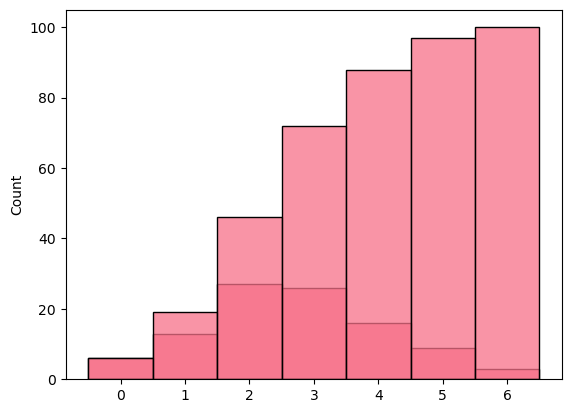

In [81]:
import seaborn as sns

sns.histplot(values, discrete=True)
sns.histplot(values, discrete=True, cumulative=True)

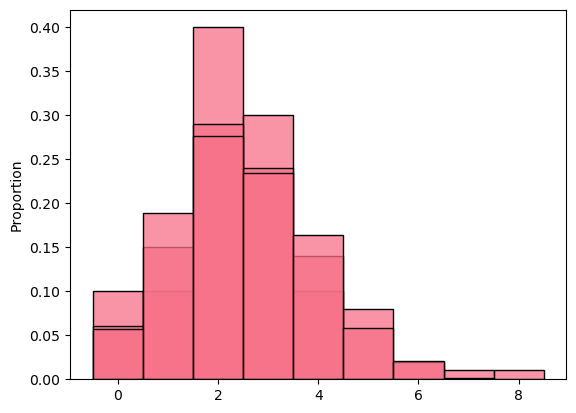

In [82]:
def values(n):
    return stats.binom.rvs(n=10, p=0.25, size=n)
sns.histplot(values(10), discrete=True, stat='proportion')
sns.histplot(values(100), discrete=True, stat='proportion')
sns.histplot(values(1000), discrete=True, stat='proportion')

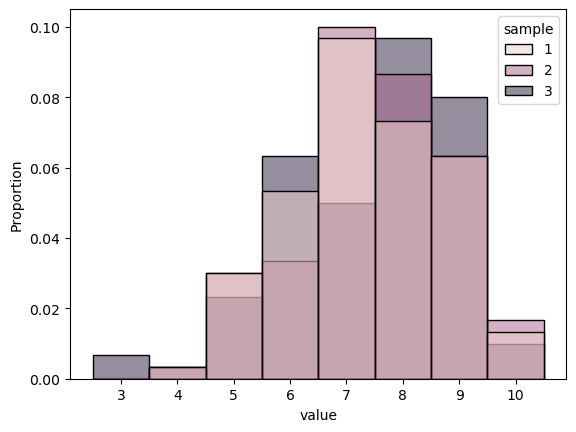

In [83]:
import pandas as pd
def values(n):
    return stats.binom.rvs(n=10, p=0.75, size=n)
data = pd.DataFrame([(s, x) for s in range(1, 4) for x in values(100)], columns=['sample', 'value'])

sns.histplot(data, discrete=True, stat='proportion', x='value', hue='sample')

### Poisson distribution

* Discrete distribution
* Large number of possible events, each of which is rare
  - Binomial dist. approaches poisson for large `n` and small `p`
* Single parameter lambda / mu: expected value

### Poisson distribution

Large number of possible events, each of which is rare, e.g.,

* the number of meteorites greater than 1 meter diameter that strike Earth in a year;
* the number of laser photons hitting a detector in a particular time interval; and
* the number of students achieving a low and high mark in an exam.

In [84]:
values = stats.poisson.rvs(mu=3, size=100)
values

array([4, 2, 6, 8, 0, 1, 4, 5, 2, 2, 2, 2, 2, 1, 2, 1, 0, 5, 8, 5, 1, 2,
       3, 3, 2, 7, 5, 7, 2, 1, 5, 4, 5, 3, 1, 2, 3, 4, 1, 4, 4, 3, 4, 2,
       5, 4, 5, 3, 4, 3, 2, 2, 1, 3, 4, 5, 5, 2, 1, 3, 2, 3, 2, 3, 4, 3,
       4, 4, 4, 4, 3, 4, 7, 3, 2, 1, 0, 6, 1, 2, 4, 1, 4, 2, 5, 2, 6, 3,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 4, 1, 3])

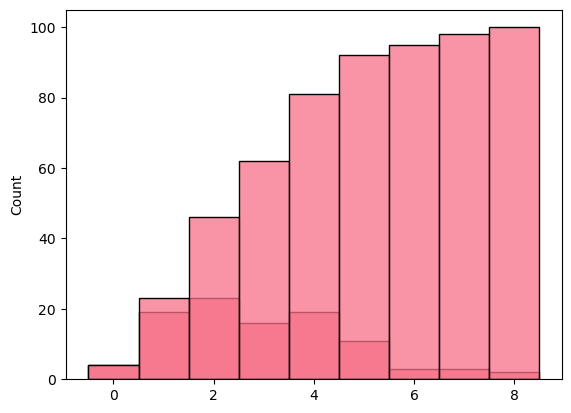

In [85]:
sns.histplot(values, discrete=True)
sns.histplot(values, discrete=True, cumulative=True)

### Continuous distributions

* Normal distribution
* t distribution
* Chi2 distribution

### Normal distribution

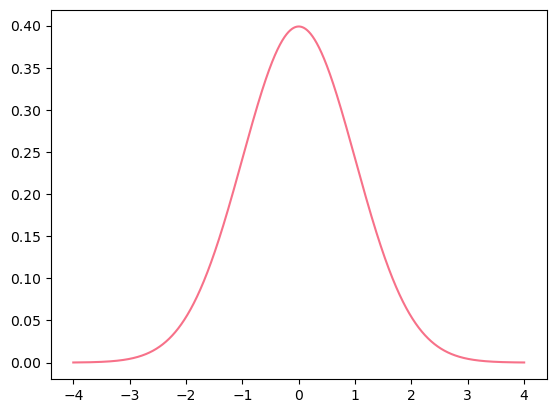

In [86]:
import matplotlib.pyplot as plt

x = np.arange(-4, 4, 0.001)
norm_values = stats.norm.pdf(x, 0, 1)

plt.plot(x, norm_values)

### T distribution

Can be used as an approximation of the normal distribution based on sample size

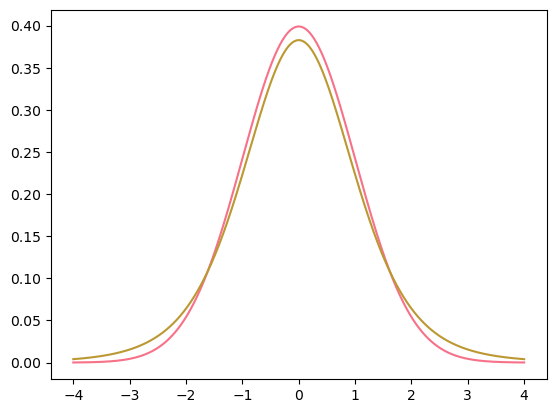

In [87]:
x = np.arange(-4, 4, 0.001)
t_values = stats.t.pdf(x, df=6)

plt.plot(x, norm_values)
plt.plot(x, t_values)

### Chi2 distribution

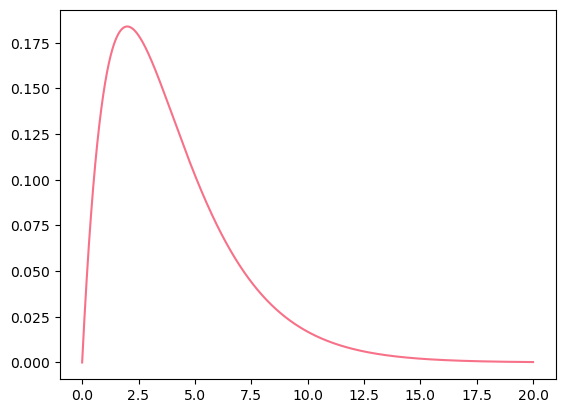

In [88]:
import matplotlib.pyplot as plt

x = np.arange(0, 20, 0.001)
values = stats.chi2.pdf(x, df=4)

plt.plot(x, values)